Seçilen veri seti modele uyarlanmaya çalışıldığından ve düzenlenmeden kullanıldığından kurulan yapı iyi sonuç vermemiştir. Bu nedenle rassal sayılar ile 1'den fazla örnek oluşturularak deneme yapılmıştır, sonuç aşağıdaki gibi iyileşmiştir.

Text(0.5, 1.0, 'Loss Function Change Graph')

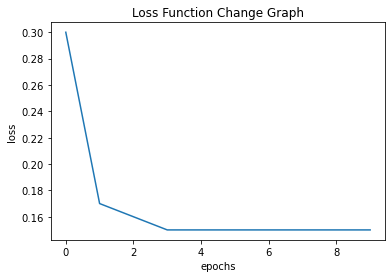

In [1]:

# %%
from unittest import result
from sklearn.metrics import mean_squared_error
from cmath import sqrt
import numpy as np                          # importing NumPy
np.random.seed(42)
input_nodes = 6                             # nodes in each layer
hidden_nodes = 4
output1_nodes = 1
output2_nodes=1

#define functions

def sig(x):                                     # Sigmoid
    return 1/(1 + np.exp(-x))
def sig_derv(x):                                # Sogmoid derivative
    return sig(x) * (1 - sig(x))

# MSE as a loss function
def mse_derv(y_true, y_pred):
    return -2*(y_true-y_pred)

# MAE for test values
def mae(y_true, y_pred):                        
    return np.mean(abs(y_true - y_pred))


w1 = np.random.random(size = (hidden_nodes, input_nodes))  # w1
b1 = np.zeros(shape = (hidden_nodes, 1))                     # b1
w2 = np.random.random(size = (output1_nodes, hidden_nodes)) # w2
b2 = np.zeros(shape = (output1_nodes, 1))                     # b2
w3 = np.random.random(size = (output2_nodes, hidden_nodes)) # w3
b3 = np.zeros(shape = (output2_nodes, 1))     #b3

# x and y changed
x= np.random.randint(1,100,size=(input_nodes,50))/ 100
y1=np.random.randint(1,100,size=(output1_nodes,50)) / 100
y2=np.random.randint(1,100,size=(output2_nodes,50)) / 100
x_test= np.random.randint(1,100,size=(input_nodes,10))/ 100
y1_test=np.random.randint(1,100,size=(output1_nodes,10)) / 100
y2_test=np.random.randint(1,100,size=(output2_nodes,10)) / 100

#output of layer

in_hidden=w1.dot(x)+b1
out_hidden=sig(in_hidden)

in_output1_layer=w2.dot(out_hidden)+b2
y1_hat=sig(in_output1_layer)

in_output2_layer=w3.dot(out_hidden)+b3
y2_hat=sig(in_output2_layer)



#calculation loss mse(y,y_hat)


learning_rate=0.09

epochs=10

# feed forward
lossf=[] # train loss values
epclis=[] #epoch numbers
lossft=[] #test loss values
ols1=[] # error values for output 1 in test 
ols2=[] # error values for output 2 in test 

#training

for epoch in range(epochs):

    in_hidden=w1.dot(x)+b1
    out_hidden=sig(in_hidden)

    in_output1_layer=w2.dot(out_hidden)+b2
    y1_hat=sig(in_output1_layer)

    in_output2_layer=w3.dot(out_hidden)+b3
    y2_hat=sig(in_output2_layer)
 

    loss1= mean_squared_error(y1,y1_hat)
    loss2= mean_squared_error(y2,y2_hat)
    epclis.append(epoch)
    total_Loss=round(loss1 + loss2,2)
    lossf.append(total_Loss)

# back propagation

    grad_w2=(mse_derv(y1,y1_hat)*sig_derv(in_output1_layer)).dot(out_hidden.T)
    grad_b2=mse_derv(y1,y1_hat).dot(sig_derv(in_output1_layer).T)
    grad_w3=(mse_derv(y2,y2_hat)*sig_derv(in_output2_layer)).dot(out_hidden.T)
    grad_b3=mse_derv(y2,y2_hat).dot(sig_derv(in_output2_layer).T)


    error_grad_Hw = ( np.sum((mse_derv(y1, y1_hat) * sig_derv(in_output1_layer)).T * w2, axis = 0).reshape((-1, 1)) 
                     + np.sum((mse_derv(y2, y2_hat) * sig_derv(in_output2_layer)).T * w3, axis = 0).reshape((-1, 1)) )
    grad_w1= (error_grad_Hw*sig_derv(in_hidden)).dot(x.T)
    error_grad_Hb=  ( np.sum((mse_derv(y1, y1_hat) * sig_derv(in_output1_layer)).T, axis = 0).reshape((-1, 1))
                     + np.sum((mse_derv(y2, y2_hat) * sig_derv(in_output2_layer)).T, axis = 0).reshape((-1, 1)) )
    grad_b1=  error_grad_Hw

    #update weights and biases

    update_w1 = -learning_rate* grad_w1                        
    w1 += update_w1                                             # w1

    update_b1 = -learning_rate * grad_b1
    b1 += update_b1                                             # b1
    
    update_w2 = -learning_rate * grad_w2
    w2 += update_w2                                             # w2
    
    update_b2 = -learning_rate * grad_b2
    b2 += update_b2                                             # b2
    
    update_w3 = -learning_rate * grad_w3
    w3 += update_w3                                             # w3
    
    update_b3 = -learning_rate * grad_b3
    b3 += update_b3  



# test

epclist=[] #test epoch number

for epoch in range(epochs):

    in_hidden=w1.dot(x_test)+b1
    out_hidden=sig(in_hidden)

    in_output1_layer=w2.dot(out_hidden)+b2
    y1_hat_test=sig(in_output1_layer)

    in_output2_layer=w3.dot(out_hidden)+b3
    y2_hat_test=sig(in_output2_layer)
 

    loss1t= mean_squared_error(y1_test,y1_hat_test)
    loss2t= mean_squared_error(y2_test,y2_hat_test)
    epclist.append(epoch)
    total_Loss=round(loss1t + loss2t,2)
    lossft.append(total_Loss)
    ortloss1= mae(y1_test,y1_hat_test)
    ortloss2= mae(y2_test,y2_hat_test)
    ols1.append(ortloss1)
    ols2.append(ortloss2)

# back propagation

    grad_w2=(mse_derv(y1_test,y1_hat_test)*sig_derv(in_output1_layer)).dot(out_hidden.T)
    grad_b2=mse_derv(y1_test,y1_hat_test).dot(sig_derv(in_output1_layer).T)
    grad_w3=(mse_derv(y2_test,y2_hat_test)*sig_derv(in_output2_layer)).dot(out_hidden.T)
    grad_b3=mse_derv(y2_test,y2_hat_test).dot(sig_derv(in_output2_layer).T)

    error_grad_Hw = ( np.sum((mse_derv(y1_test, y1_hat_test) * sig_derv(in_output1_layer)).T * w2, axis = 0).reshape((-1, 1))
                     + np.sum((mse_derv(y2_test, y2_hat_test) * sig_derv(in_output2_layer)).T * w3, axis = 0).reshape((-1, 1)) )
    grad_w1= (error_grad_Hw*sig_derv(in_hidden)).dot(x_test.T)
    error_grad_Hb=  ( np.sum((mse_derv(y1_test, y1_hat_test) * sig_derv(in_output1_layer)), axis = 0).reshape((-1, 1))
                     + np.sum((mse_derv(y2_test, y2_hat_test) * sig_derv(in_output2_layer)), axis = 0).reshape((-1, 1)) )
    grad_b1=  error_grad_Hw

    #update weights and biases

    update_w1 = -learning_rate* grad_w1                        
    w1 += update_w1                                             # w1

    update_b1 = -learning_rate * grad_b1
    b1 += update_b1                                             # b1
    
    update_w2 = -learning_rate * grad_w2
    w2 += update_w2                                             # w2
    
    update_b2 = -learning_rate * grad_b2    
    b2 += update_b2                                             # b2
    
    update_w3 = -learning_rate * grad_w3
    w3 += update_w3                                             # w3
    
    update_b3 = -learning_rate * grad_b3
    b3 += update_b3  

 

import matplotlib.pyplot as plt
plt.plot(epclis, lossf) # plot 
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss Function Change Graph')



# %%


Text(0.5, 1.0, 'average loss graph for output1 ')

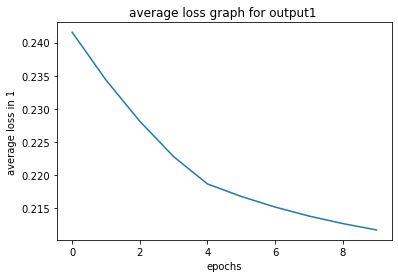

In [2]:
plt.plot(epclist, ols1 ) # plot 
plt.xlabel('epochs')
plt.ylabel('average loss in 1')
plt.title('average loss graph for output1 ')

Text(0.5, 1.0, 'average loss graph for output2 ')

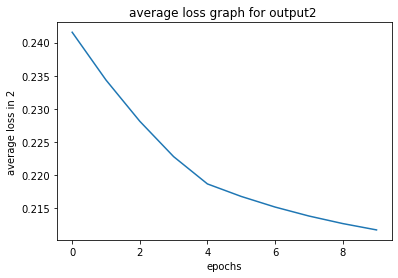

In [3]:
plt.plot(epclist, ols1 ) # plot 
plt.xlabel('epochs')
plt.ylabel('average loss in 2')
plt.title('average loss graph for output2 ') 